In [246]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [248]:

train = pd.read_csv('../data/clean/train.csv')


FEATURES = list(train.columns[2:])
FEATURES

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Miss',
 'Mr',
 'Mrs',
 'Rare',
 'male',
 'Q',
 'S']

In [289]:
y = train[['Survived']]
X = train[FEATURES]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)




In [290]:
X_train = tf.constant(X_train.to_numpy(), dtype=tf.float32)
X_test = tf.constant(X_test.to_numpy(), dtype=tf.float32)
y_train = tf.squeeze(tf.constant(y_train.to_numpy(), dtype=tf.float32), axis=1)
y_test = tf.squeeze(tf.constant(y_test.to_numpy(), dtype=tf.float32))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([757, 12]),
 TensorShape([134, 12]),
 TensorShape([757]),
 TensorShape([134]))

In [291]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', name='Hidden_Layer_1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='tanh', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output_Layer')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [292]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=2)
model.evaluate(X_test, y_test)

Epoch 1/500
24/24 - 1s - loss: 0.7242 - accuracy: 0.6090 - val_loss: 0.7346 - val_accuracy: 0.5821 - 913ms/epoch - 38ms/step
Epoch 2/500
24/24 - 0s - loss: 0.6872 - accuracy: 0.6235 - val_loss: 0.6991 - val_accuracy: 0.5821 - 91ms/epoch - 4ms/step
Epoch 3/500
24/24 - 0s - loss: 0.6612 - accuracy: 0.6262 - val_loss: 0.6712 - val_accuracy: 0.5821 - 96ms/epoch - 4ms/step
Epoch 4/500
24/24 - 0s - loss: 0.6394 - accuracy: 0.6433 - val_loss: 0.6443 - val_accuracy: 0.5896 - 73ms/epoch - 3ms/step
Epoch 5/500
24/24 - 0s - loss: 0.6122 - accuracy: 0.6777 - val_loss: 0.6128 - val_accuracy: 0.6493 - 143ms/epoch - 6ms/step
Epoch 6/500
24/24 - 0s - loss: 0.5851 - accuracy: 0.7094 - val_loss: 0.5826 - val_accuracy: 0.7015 - 80ms/epoch - 3ms/step
Epoch 7/500
24/24 - 0s - loss: 0.5636 - accuracy: 0.7266 - val_loss: 0.5544 - val_accuracy: 0.7313 - 65ms/epoch - 3ms/step
Epoch 8/500
24/24 - 0s - loss: 0.5507 - accuracy: 0.7371 - val_loss: 0.5280 - val_accuracy: 0.7985 - 56ms/epoch - 2ms/step
Epoch 9/500
2

[0.4142843186855316, 0.8283582329750061]

In [293]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 10)                130       
                                                                 
 dropout_21 (Dropout)        (None, 10)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                110       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

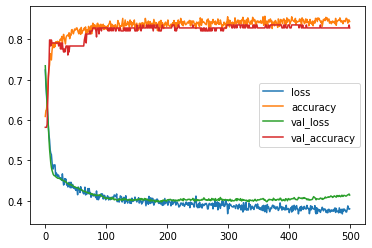

In [294]:
pd.DataFrame(history.history).plot()

In [295]:
y_pred = model.predict(X_test)

In [296]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8284


[0.4142843186855316, 0.8283582329750061]

In [297]:
np.mean((y_pred>0.5).reshape(1,-1) == y_test)

0.8283582089552238

In [298]:
model.save('../models/tf/saved_model/my_model')

2021-12-15 11:48:09.494219: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/tf/saved_model/my_model/assets


INFO:tensorflow:Assets written to: ../models/tf/saved_model/my_model/assets
